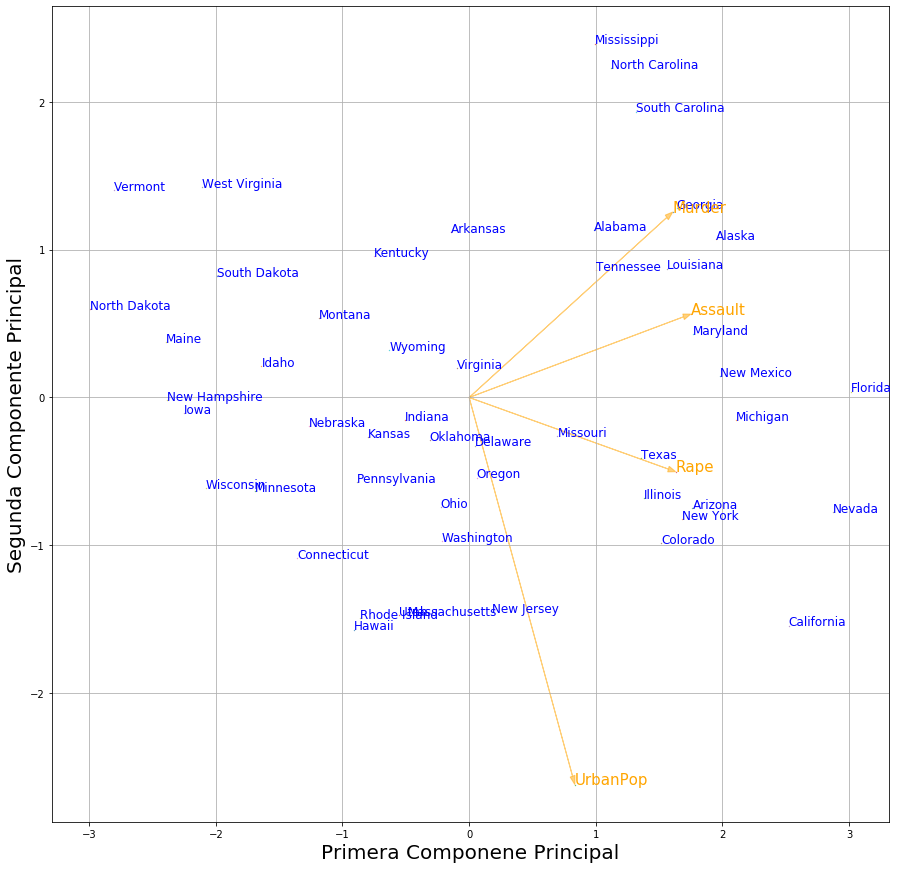

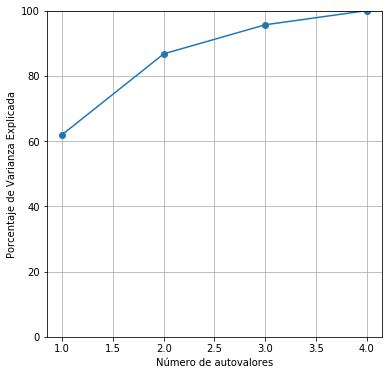

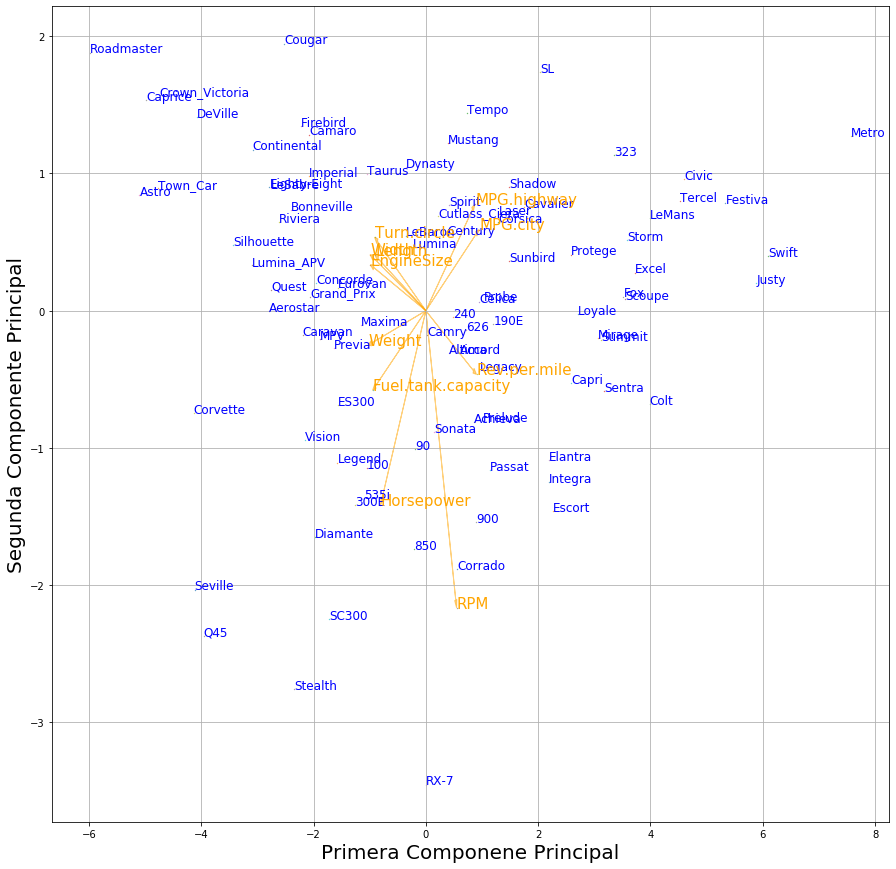

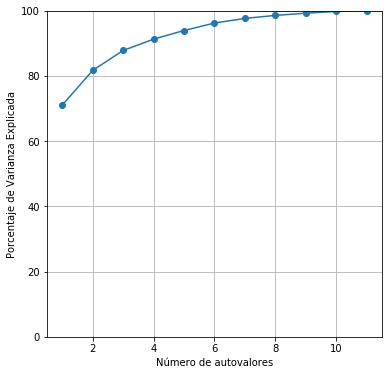

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def STD(X):
    k = len(X[0])
    data_s = []
    for i in range(k):
        Xm = np.mean(X.T[i])
        Xs = np.std(X.T[i])
        data_s.append( (X.T[i]-Xm)/Xs )
    return np.array(data_s),k

def myPCA(data):
    S = 1/N*(data@data.T)
    w , v = np.linalg.eig(S)
    ii = np.argsort(w)[::-1]
    v = v.T[ii]
    w = w[ii]
    return v , w, ii

####  Arrestos ---------------------------------------------
data = pd.read_csv('USArrests.csv')
data = data.fillna(0)

ii = [1,2,3,4]
columns = np.array(data.keys()[ii])
X = np.array(data[columns])
N = len(X)
cities = np.array(data['Unnamed: 0'])

Xs,k = STD(X)
v, w, ii = myPCA(Xs)
cc = []

for i in range(N):
    x = 0
    y = 0
    for j in range(k):
        x += v[0,j]*Xs[j][i]
        y += v[1,j]*Xs[j][i]
    cc.append((x,y))
    
cc=np.array(cc)
fig, ax = plt.subplots(figsize=(15,15))
for i in range(N):
    xx = cc[i,0]
    yy = cc[i,1]
    ax.scatter(xx,yy,s=0.1)
    ax.text(xx,yy, cities[i], fontsize=12,color="blue")
    ax.set_xlabel("Primera Componene Principal",size=20)
    ax.set_ylabel("Segunda Componente Principal",size=20)
for i in range(k):
    xx = v[0,i]*3
    yy = v[1,i]*3
    ax.scatter(xx,yy, s=0.1)
    ax.text(xx,yy, columns[i], fontsize=15,color="orange")
    ax.arrow(0,0,xx,yy,alpha=0.5, head_width=0.04, fc='orange', ec='orange', length_includes_head=True)    
plt.grid()
plt.savefig("arrestos.png")
plt.show()

fig = plt.figure(figsize=(6,6))
var = []
for i in range(1,len(w)+1):
    wt = 0
    for j in range(i):
        wt = wt + w[j]
    var.append(wt/sum(w)*100)
plt.plot(range(1,len(w)+1),var,"-o")
plt.xlabel("Número de autovalores")
plt.ylabel("Porcentaje de Varianza Explicada")
plt.ylim(0,100)
plt.grid()
plt.savefig("varianza_arrestos.png")
plt.show()

####  Carros ---------------------------------------------
data = pd.read_csv('Cars93.csv')
data = data.fillna(0)

columns = np.array(['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 
           'RPM', 'Rev.per.mile', 'Fuel.tank.capacity', 'Length', 
           'Width', 'Turn.circle', 'Weight'])
X = np.array(data[columns])
N = len(X)
cars = np.array(data['Model'])

Xs,k = STD(X)
v, w, ii = myPCA(Xs)
cc = []

for i in range(N):
    x = 0
    y = 0
    for j in range(k):
        x += v[0,j]*Xs[j][i]
        y += v[1,j]*Xs[j][i]
    cc.append((x,y))
    
cc=np.array(cc)
fig, ax = plt.subplots(figsize=(15,15))
for i in range(N):
    xx = cc[i,0]
    yy = cc[i,1]
    ax.scatter(xx,yy,s=0.1)
    ax.text(xx,yy, cars[i], fontsize=12,color="blue")
    ax.set_xlabel("Primera Componene Principal",size=20)
    ax.set_ylabel("Segunda Componente Principal",size=20)
for i in range(k):
    xx = v[0,i]*3
    yy = v[1,i]*3
    ax.scatter(xx,yy, s=0.1)
    ax.text(xx,yy, columns[i], fontsize=15,color="orange")
    ax.arrow(0,0,xx,yy,alpha=0.5, head_width=0.04, fc='orange', ec='orange', length_includes_head=True)    
plt.grid()
plt.savefig("cars.png")
plt.show()


fig = plt.figure(figsize=(6,6))
var = []
for i in range(1,len(w)+1):
    wt = 0
    for j in range(i):
        wt = wt + w[j]
    var.append(wt/sum(w)*100)
plt.plot(range(1,len(w)+1),var,"-o")
plt.xlabel("Número de autovalores")
plt.ylabel("Porcentaje de Varianza Explicada")
plt.ylim(0,100)
plt.grid()
plt.savefig("varianza_cars.png")
plt.show()